# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
from pprint import pprint
# Import API key - DO NOT PUSH TO GitHub

from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities_list = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities_list:
        cities_list.append(city)

# Print the city count to confirm sufficient count
len(cities_list)

633

In [3]:
cities_list

['ahuimanu',
 'santiago',
 'rikitea',
 'upernavik',
 'cape town',
 'biak',
 'suining',
 'kangaatsiaq',
 'bredasdorp',
 'new norfolk',
 'hermanus',
 'la ronge',
 'sakakah',
 'souris',
 'puerto ayora',
 'kargat',
 'saint-pierre',
 'kysyl-syr',
 'kodiak',
 'guozhen',
 'ushuaia',
 'port elizabeth',
 'hilo',
 'avarua',
 'hastings',
 'castro',
 'ambovombe',
 'hithadhoo',
 'krasnovishersk',
 'port alfred',
 'saint-philippe',
 'illapel',
 'fairbanks',
 'zhigansk',
 'sandnessjoen',
 'jardim',
 'mys shmidta',
 'dabakala',
 'cumaribo',
 'slavonski brod',
 'katsuura',
 'tuktoyaktuk',
 'taltal',
 'kati',
 'ribeira grande',
 'asosa',
 'liverpool',
 'cayenne',
 'albany',
 'marawi',
 'darab',
 'roald',
 'lebu',
 'gorontalo',
 'husavik',
 'vrangel',
 'jatai',
 'presidencia roque saenz pena',
 'busselton',
 'yellowknife',
 'hoquiam',
 'apac',
 'rio gallegos',
 'tarakan',
 'jamestown',
 'agirish',
 'bengkulu',
 'barrow',
 'nam tha',
 'dryden',
 'ilulissat',
 'gat',
 'nouadhibou',
 'saskylakh',
 'kushmuru

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#The base URL to access the OpenWeather API Data, remove all data after ?
#api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
base_url='http://api.openweathermap.org/data/2.5/weather?'

#Add API Key and City Name to Query_URL
#query_url=f'{base_url}q={city_name}&appid={weather_api_key}'
# city_name='Denver'
#Dataset Columns: City, Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed, Country, Date

city_list_500=[]
lat_500=[]
long_500=[]
max_temp_500=[]
humidity_500=[]
cloudiness_500=[]
wind_speed_500=[]
country_500=[]
date_500=[]
counter=0
group=1

#For loop itterates through list of randomly generated cities, 
#pings the OpenWeather database for each city and appends the cities information to empty lists

for each_city in cities_list:
    try:
        query_url=f'{base_url}q={each_city}&appid={weather_api_key}'
        weather_response=requests.get(query_url)
        weather_data=weather_response.json()
    #     print(each_city)
#         pprint(weather_data)
        city_list_500.append(weather_data['name'])
        lat_500.append(weather_data['coord']['lat'])
    #     print(lat_500)
        long_500.append(weather_data['coord']['lon'])
        max_temp_500.append(weather_data['main']['temp_max'])
        humidity_500.append(weather_data['main']['humidity'])
        cloudiness_500.append(weather_data['clouds']['all'])
        wind_speed_500.append(weather_data['wind']['speed'])
        country_500.append(weather_data['sys']['country'])
        date_500.append(weather_data['dt'])
        counter+=1
        
        if counter>50:
            counter=1
            group=group+1
        
        print(f'Processing record {counter} of set {group} | {each_city}')
    
    except:
        print('City not found in OpenWeather API.')
        
# print(city_list_500)
# print(lat_500)
# print(long_500)
# print(max_temp_500)
# print(humidity_500)
# print(cloudiness_500)
# print(wind_speed_500)
# print(country_500)
# print(date_500)

#Add API Key and City Name to Query_URL

# city_name='Denver'
#Using 
# parameters={'q': city_name,
#             'aapid':weather_api_key
#           }
# weather_response=requests.get(base_url,params=parameters).json()

Processing record 1 of set 1 | ahuimanu
Processing record 2 of set 1 | santiago
Processing record 3 of set 1 | rikitea
Processing record 4 of set 1 | upernavik
Processing record 5 of set 1 | cape town
Processing record 6 of set 1 | biak
Processing record 7 of set 1 | suining
Processing record 8 of set 1 | kangaatsiaq
Processing record 9 of set 1 | bredasdorp
Processing record 10 of set 1 | new norfolk
Processing record 11 of set 1 | hermanus
Processing record 12 of set 1 | la ronge
Processing record 13 of set 1 | sakakah
Processing record 14 of set 1 | souris
Processing record 15 of set 1 | puerto ayora
Processing record 16 of set 1 | kargat
Processing record 17 of set 1 | saint-pierre
Processing record 18 of set 1 | kysyl-syr
Processing record 19 of set 1 | kodiak
Processing record 20 of set 1 | guozhen
Processing record 21 of set 1 | ushuaia
Processing record 22 of set 1 | port elizabeth
Processing record 23 of set 1 | hilo
Processing record 24 of set 1 | avarua
Processing record 25 

City not found in OpenWeather API.
Processing record 34 of set 4 | christchurch
Processing record 35 of set 4 | finschhafen
Processing record 36 of set 4 | alim
Processing record 37 of set 4 | alice springs
Processing record 38 of set 4 | manzini
Processing record 39 of set 4 | carnarvon
Processing record 40 of set 4 | chabahar
Processing record 41 of set 4 | russell
Processing record 42 of set 4 | tucurui
Processing record 43 of set 4 | farah
Processing record 44 of set 4 | akdepe
Processing record 45 of set 4 | moerai
City not found in OpenWeather API.
Processing record 46 of set 4 | ambilobe
Processing record 47 of set 4 | hasaki
Processing record 48 of set 4 | tiksi
Processing record 49 of set 4 | bereda
Processing record 50 of set 4 | sechura
Processing record 1 of set 5 | sidi ali
City not found in OpenWeather API.
Processing record 2 of set 5 | sisimiut
Processing record 3 of set 5 | ingham
Processing record 4 of set 5 | yar-sale
City not found in OpenWeather API.
Processing rec

Processing record 20 of set 8 | talikota
Processing record 21 of set 8 | kendari
Processing record 22 of set 8 | itoman
Processing record 23 of set 8 | santos reyes nopala
Processing record 24 of set 8 | loma alta
Processing record 25 of set 8 | diamantino
Processing record 26 of set 8 | grand gaube
Processing record 27 of set 8 | bandarbeyla
Processing record 28 of set 8 | conde
Processing record 29 of set 8 | camacha
Processing record 30 of set 8 | mezen
Processing record 31 of set 8 | mayumba
Processing record 32 of set 8 | ucluelet
City not found in OpenWeather API.
Processing record 33 of set 8 | pangoa
Processing record 34 of set 8 | kaitangata
Processing record 35 of set 8 | saquarema
Processing record 36 of set 8 | faro
Processing record 37 of set 8 | nanortalik
Processing record 38 of set 8 | warri
City not found in OpenWeather API.
Processing record 39 of set 8 | luganville
Processing record 40 of set 8 | thinadhoo
Processing record 41 of set 8 | sarai naurang
Processing reco

Processing record 7 of set 12 | agadez
Processing record 8 of set 12 | sola
City not found in OpenWeather API.
Processing record 9 of set 12 | kaduna
Processing record 10 of set 12 | abu kamal
City not found in OpenWeather API.
City not found in OpenWeather API.
Processing record 11 of set 12 | new richmond
Processing record 12 of set 12 | poum
Processing record 13 of set 12 | edd
Processing record 14 of set 12 | kijang
Processing record 15 of set 12 | te anau
Processing record 16 of set 12 | kavaratti
Processing record 17 of set 12 | narimanov
City not found in OpenWeather API.
Processing record 18 of set 12 | anastacio
Processing record 19 of set 12 | foix
Processing record 20 of set 12 | victoria point
Processing record 21 of set 12 | the valley
Processing record 22 of set 12 | apucarana
Processing record 23 of set 12 | tahta
Processing record 24 of set 12 | epe
Processing record 25 of set 12 | linxia
Processing record 26 of set 12 | mbandaka
Processing record 27 of set 12 | oistins

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Create original data frame for the weather data from the generated lists
weather_data_dict={'City':city_list_500,
                      'Latitude':lat_500,
                      'Longitude':long_500,
                      'Max Temp':max_temp_500,
                      'Humidity':humidity_500,
                      'Cloudiness':cloudiness_500,
                      'Wind Speed':wind_speed_500,
                      'Country':country_500,
                      'Date':date_500
                     }

weather_0_df=pd.DataFrame(weather_data_dict)
weather_0_df.head(10)

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,‘Āhuimanu,21.4447,-157.8378,297.15,73,90,6.17,US,1611863517
1,Santiago,-33.4569,-70.6483,303.71,24,75,3.60,CL,1611863227
2,Rikitea,-23.1203,-134.9692,299.64,68,89,2.82,PF,1611863518
3,Upernavik,72.7868,-56.1549,248.70,88,70,4.92,GL,1611863518
4,Cape Town,-33.9258,18.4232,293.71,63,0,4.12,ZA,1611862870
5,Biak,-0.9131,122.8766,298.20,76,92,2.77,ID,1611863518
6,Suining,30.5080,105.5733,283.16,70,93,1.27,CN,1611863518
7,Kangaatsiaq,68.3065,-53.4641,259.42,88,1,4.42,GL,1611863518
8,Bredasdorp,-34.5322,20.0403,290.15,67,5,2.57,ZA,1611863406
9,New Norfolk,-42.7826,147.0587,287.59,57,93,0.89,AU,1611863001


In [6]:
#Print a describe table for the weather data frame
weather_0_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,5.840000e+02
mean,19.187011,18.062235,283.570034,71.243151,51.738014,3.907158,1.611864e+09
std,32.801800,88.959953,18.550976,20.073257,40.606105,2.732795,8.624275e+01
min,-54.800000,-175.200000,225.630000,12.000000,0.000000,0.220000,1.611863e+09
25%,-7.064925,-60.472500,272.145000,60.000000,1.750000,1.907500,1.611864e+09
50%,20.705800,23.441650,289.985000,76.000000,64.000000,3.310000,1.611864e+09
75%,46.558325,96.217525,298.717500,86.000000,92.250000,5.140000,1.611864e+09
max,78.218600,179.316700,310.150000,100.000000,100.000000,16.380000,1.611864e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#Filter out cities with humidities great than 100%
#weather_1_df applies the humidy filter to weather_0_df
humidity_filter=weather_0_df.loc[:,'Humidity']<=100
weather_1_df=weather_0_df.loc[humidity_filter,:]
weather_1_df.head()
weather_1_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,5.840000e+02
mean,19.187011,18.062235,283.570034,71.243151,51.738014,3.907158,1.611864e+09
std,32.801800,88.959953,18.550976,20.073257,40.606105,2.732795,8.624275e+01
min,-54.800000,-175.200000,225.630000,12.000000,0.000000,0.220000,1.611863e+09
25%,-7.064925,-60.472500,272.145000,60.000000,1.750000,1.907500,1.611864e+09
50%,20.705800,23.441650,289.985000,76.000000,64.000000,3.310000,1.611864e+09
75%,46.558325,96.217525,298.717500,86.000000,92.250000,5.140000,1.611864e+09
max,78.218600,179.316700,310.150000,100.000000,100.000000,16.380000,1.611864e+09


In [8]:
#  Get the indices of cities that have humidity over 100%.
humidity_over_filter=weather_0_df.loc[:,'Humidity']>100
weather_over_df=weather_0_df.loc[humidity_over_filter,:]
list(weather_over_df.index)
weather_over_df.index

Int64Index([], dtype='int64')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#THIS WAS DONE IN ONE STEP USING .LOC FILTERS, VERIFY THAT THIS IS AN OKAY APPROACH 
#RATHER THAN FILTERING BY INDEX

In [10]:
#Export Weather Data Frame to CSV
weather_1_df.to_csv(output_data_file)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

The Max Temperature vs. City Latitude scatter plot visualy displays how the latitude of a city 
impacts its Maximum Temerature. Based on this relationship, it is clear that the highest Maximum Temperatures 
occur in cities closest to the equator (0 Degreese Latitude).


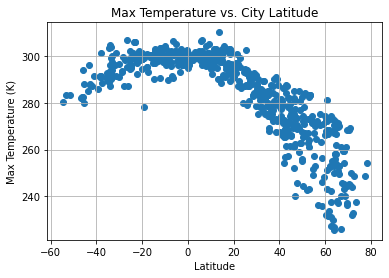

In [12]:
#Scatter plot of max temperature vs latitude for weather data after filtering out cities with humidity >100 
x_lat=weather_1_df['Latitude']
y_maxtemp=weather_1_df['Max Temp']

plt.scatter(x_lat,y_maxtemp)
plt.title('Max Temperature vs. City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (K)')
plt.grid(b=True)
plt.savefig('output_data/MaxTemp_Lat_Scatter.png')

print(f'The Max Temperature vs. City Latitude scatter plot visualy displays how the latitude of a city \nimpacts its Maximum Temerature. Based on this relationship, it is clear that the highest Maximum Temperatures \noccur in cities closest to the equator (0 Degreese Latitude).')

## Latitude vs. Humidity Plot

The Humidity vs. City Latitude scatter plot visualy displays how the latitude of a city 
impacts its Humidity level. There does not appear to be an obvious trend between the two variables.


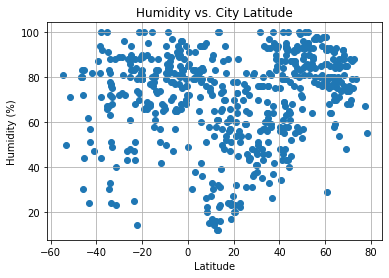

In [13]:
#Scatter plot of humidity vs latitude for weather data after filtering out cities with humidity >100 
x_lat=weather_1_df['Latitude']
y_humidity=weather_1_df['Humidity']

plt.scatter(x_lat,y_humidity)
plt.title('Humidity vs. City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(b=True)
plt.savefig('output_data/Humidity_Lat_Scatter.png')

print(f'The Humidity vs. City Latitude scatter plot visualy displays how the latitude of a city \nimpacts its Humidity level. There does not appear to be an obvious trend between the two variables.')

## Latitude vs. Cloudiness Plot

The Cloudiness vs. City Latitude scatter plot visualy displays how the latitude of a city 
impacts its CLoudiness level. There does not appear to be an obvious trend between the two variables.


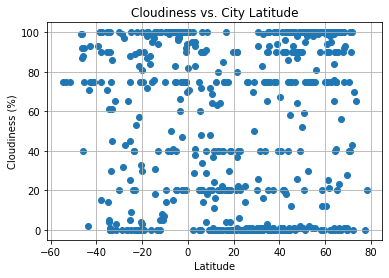

In [14]:
#Scatter plot of cloudiness vs latitude for weather data after filtering out cities with humidity >100 
x_lat=weather_1_df['Latitude']
y_cloudiness=weather_1_df['Cloudiness']

plt.scatter(x_lat,y_cloudiness)
plt.title('Cloudiness vs. City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(b=True)
plt.savefig('output_data/Cloudiness_Lat_Scatter.png')

print(f'The Cloudiness vs. City Latitude scatter plot visualy displays how the latitude of a city \nimpacts its CLoudiness level. There does not appear to be an obvious trend between the two variables.')

## Latitude vs. Wind Speed Plot

The Wind Speed vs. City Latitude scatter plot visualy displays how the latitude of a city 
impacts its Wind Speed. There does not appear to be an obvious trend between the two variables.


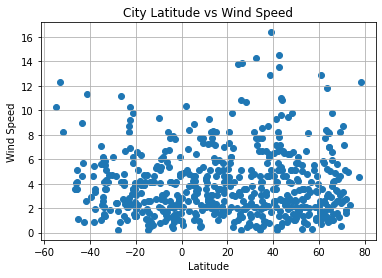

In [15]:
#Scatter plot of wind speed vs latitude for weather data after filtering out cities with humidity >100 
x_lat=weather_1_df['Latitude']
y_windspeed=weather_1_df['Wind Speed']

plt.scatter(x_lat,y_windspeed)
plt.title('City Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(b=True)
plt.savefig('output_data/WindSpeed_Lat_Scatter.png')

print(f'The Wind Speed vs. City Latitude scatter plot visualy displays how the latitude of a city \nimpacts its Wind Speed. There does not appear to be an obvious trend between the two variables.')

## Linear Regression

In [16]:
#Northern Hemisphere Filter (Latitude>=0), assume that the equator is grouped into Norther Hemisphere
#weather_2_df includes only cities in the norther hemisphere
northern_filter=weather_1_df.loc[:,'Latitude']>=0
weather_2_df=weather_1_df.loc[northern_filter,:]
weather_2_df.head()
weather_2_df.describe()
# len(weather_2_df)

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,3.960000e+02
mean,37.842364,12.512956,277.358965,69.883838,47.969697,4.020076,1.611864e+09
std,20.421679,85.561172,19.287684,21.251398,40.774950,2.861232,8.133983e+01
min,0.048700,-173.300000,225.630000,12.000000,0.000000,0.220000,1.611863e+09
25%,19.744925,-63.853125,266.480000,57.000000,1.000000,1.960000,1.611864e+09
50%,39.638150,20.179900,279.330000,76.000000,40.000000,3.345000,1.611864e+09
75%,54.685425,79.929225,294.470000,86.000000,90.000000,5.210000,1.611864e+09
max,78.218600,179.316700,310.150000,100.000000,100.000000,16.380000,1.611864e+09


In [17]:
#Souther Hemisphere Filter (Latitude<0)
#weather_3_df includes only cities in the southern hemisphere
southern_filter=weather_1_df.loc[:,'Latitude']<0
weather_3_df=weather_1_df.loc[southern_filter,:]
weather_3_df.head()
weather_3_df.describe()
# len(weather_3_df)

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,1.880000e+02
mean,-20.108306,29.751144,296.652926,74.106383,59.675532,3.669309,1.611864e+09
std,13.570787,94.902844,5.772849,17.032192,39.182093,2.430345,9.583917e+01
min,-54.800000,-175.200000,278.150000,14.000000,0.000000,0.250000,1.611863e+09
25%,-31.510725,-55.851075,293.620000,67.000000,20.000000,1.827500,1.611864e+09
50%,-19.995300,27.401300,298.430000,79.000000,75.000000,3.190000,1.611864e+09
75%,-8.121250,125.021675,300.515000,85.250000,99.000000,4.822500,1.611864e+09
max,-0.413900,174.818300,307.040000,100.000000,100.000000,12.350000,1.611864e+09


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

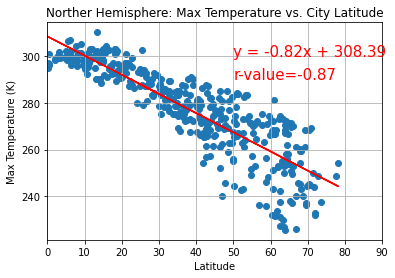

In [34]:
#Norther Hemisphere max temperature vs latitude for weather data after filtering out cities with humidity >100 
#Linear Regression

x_lat=weather_2_df['Latitude']
y_maxtemp=weather_2_df['Max Temp']
                                   
plt.scatter(x_lat,y_maxtemp)
plt.title('Norther Hemisphere: Max Temperature vs. City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (K)')
plt.grid(b=True)
plt.xlim(0,90)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_maxtemp)
regress_values = x_lat * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(50,300),fontsize=15,color="red")
plt.annotate(f'r-value={round(rvalue,2)}',(50,290),fontsize=15,color="red")

plt.savefig('output_data/Norther_MaxTemp_Lat_Reg.png')

northern_equator_temp=intercept

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

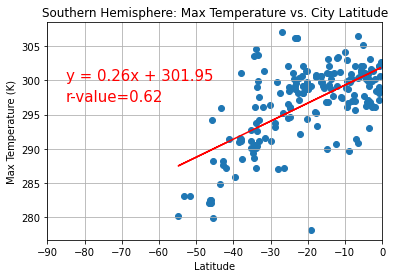

In [35]:
#SOuthern Hemisphere max temperature vs latitude for weather data after filtering out cities with humidity >100 
#Linear Regression

x_lat=weather_3_df['Latitude']
y_maxtemp=weather_3_df['Max Temp']
                                            
plt.scatter(x_lat,y_maxtemp)
plt.title('Southern Hemisphere: Max Temperature vs. City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (K)')
plt.grid(b=True)
plt.xlim(-90,0)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_maxtemp)
regress_values = x_lat * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(-85,300),fontsize=15,color="red")
plt.annotate(f'r-value={round(rvalue,2)}',(-85,297),fontsize=15,color="red")

plt.savefig('output_data/Southern_MaxTemp_Lat_Reg.png')

southern_equator_temp=intercept

In [36]:
#Analysis of Latitude of Max Temperature vs. Latitude for the Northern and Southern Hemospheres
print(f'Based on the Max Temperature vs. Latitude regression for the Northern and Southern Hemispheres,\nthe expected temperatures at the equator are {round(northern_equator_temp,2)} K and {round(southern_equator_temp,2)} K respectively.\nCombining these two results together, the Max Temperature near the equator is likely close to {round((northern_equator_temp+southern_equator_temp)/2,2)} K.')

Based on the Max Temperature vs. Latitude regression for the Northern and Southern Hemispheres,
the expected temperatures at the equator are 308.39 K and 301.95 K respectively.
Combining these two results together, the Max Temperature near the equator is likely close to 305.17 K.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

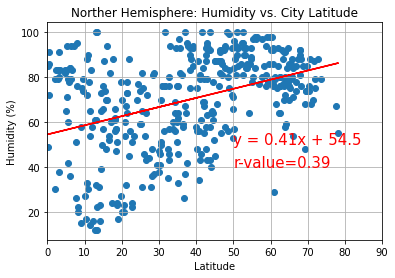

In [37]:
#Norther Hemisphere max temperature vs latitude for weather data after filtering out cities with humidity >100 
#Linear Regression

x_lat=weather_2_df['Latitude']
y_humidity=weather_2_df['Humidity']
                                          
plt.scatter(x_lat,y_humidity)
plt.title('Norther Hemisphere: Humidity vs. City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(b=True)
plt.xlim(0,90)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_humidity)
regress_values = x_lat * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(50,50),fontsize=15,color="red")
plt.annotate(f'r-value={round(rvalue,2)}',(50,40),fontsize=15,color="red")
plt.savefig('output_data/Northern_Humidity_Lat_Reg.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

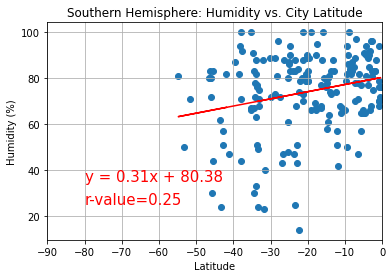

In [39]:
#Southern Hemisphere humidity vs latitude for weather data after filtering out cities with humidity >100 
#Linear Regression

x_lat=weather_3_df['Latitude']
y_humidity=weather_3_df['Humidity']
                                          
plt.scatter(x_lat,y_humidity)
plt.title('Southern Hemisphere: Humidity vs. City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(b=True)
plt.xlim(-90,0)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_humidity)
regress_values = x_lat * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(-80,35),fontsize=15,color="red")
plt.annotate(f'r-value={round(rvalue,2)}',(-80,25),fontsize=15,color="red")
plt.savefig('output_data/Southern_Humidity_Lat_Reg.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

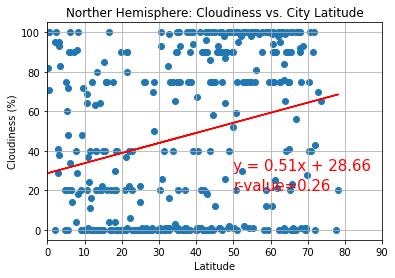

In [40]:
#Norther Hemisphere cloudiness vs latitude for weather data after filtering out cities with humidity >100 
#Linear Regression

x_lat=weather_2_df['Latitude']
y_cloudiness=weather_2_df['Cloudiness']
                                          
plt.scatter(x_lat,y_cloudiness)
plt.title('Norther Hemisphere: Cloudiness vs. City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(b=True)
plt.xlim(0,90)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_cloudiness)
regress_values = x_lat * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(50,30),fontsize=15,color="red")
plt.annotate(f'r-value={round(rvalue,2)}',(50,20),fontsize=15,color="red")
plt.savefig('output_data/Northern_Cloudiness_Lat_Reg.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

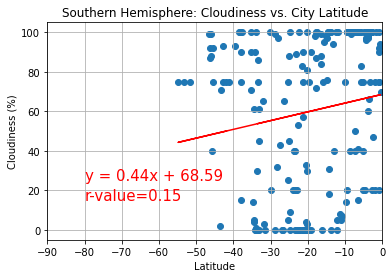

In [42]:
#Southern Hemisphere cloudiness vs latitude for weather data after filtering out cities with humidity >100 
#Linear Regression

x_lat=weather_3_df['Latitude']
y_cloudiness=weather_3_df['Cloudiness']
                                          
plt.scatter(x_lat,y_cloudiness)
plt.title('Southern Hemisphere: Cloudiness vs. City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(b=True)
plt.xlim(-90,0)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_cloudiness)
regress_values = x_lat * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(-80,25),fontsize=15,color="red")
plt.annotate(f'r-value={round(rvalue,2)}',(-80,15),fontsize=15,color="red")
plt.savefig('output_data/Southern_Cloudiness_Lat_Reg.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

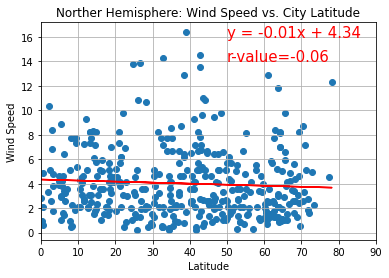

In [44]:
#Norther Hemisphere Wind Speed vs latitude for weather data after filtering out cities with humidity >100 
#Linear Regression

x_lat=weather_2_df['Latitude']
y_windspeed=weather_2_df['Wind Speed']
                                          
plt.scatter(x_lat,y_windspeed)
plt.title('Norther Hemisphere: Wind Speed vs. City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(b=True)
plt.xlim(0,90)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_windspeed)
regress_values = x_lat * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(50,16),fontsize=15,color="red")
plt.annotate(f'r-value={round(rvalue,2)}',(50,14),fontsize=15,color="red")
plt.savefig('output_data/Northern_WindSpeed_Lat_Reg.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

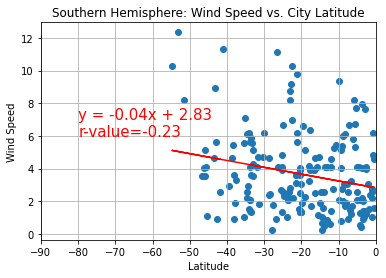

In [45]:
#Southern Hemisphere Wind Speed vs latitude for weather data after filtering out cities with humidity >100 
#Linear Regression

x_lat=weather_3_df['Latitude']
y_windspeed=weather_3_df['Wind Speed']
                                          
plt.scatter(x_lat,y_windspeed)
plt.title('Southern Hemisphere: Wind Speed vs. City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(b=True)
plt.xlim(-90,0)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_windspeed)
regress_values = x_lat * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(-80,7),fontsize=15,color="red")
plt.annotate(f'r-value={round(rvalue,2)}',(-80,6),fontsize=15,color="red")
plt.savefig('output_data/Southern_WindSpeed_Lat_Reg.png')